Enter 'url' for a web image or 'local' for a local image:  local
Enter the path to the local image:  C:\Users\Public\Datasets\pavan.png


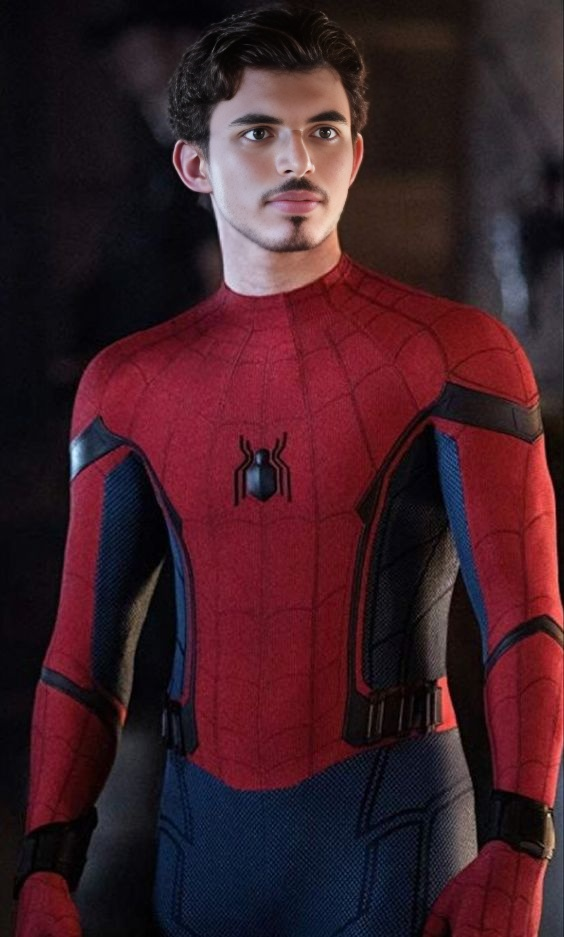

Enter your questions one by one. Type 'done' when finished.


Question:  is the person wearing spectacles
Question:  color of dress


In [ ]:
#VQA from User input Questions
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
import google.generativeai as genai

# Bold formatting for output
BOLD_BEGIN = "\033[1m"
BOLD_END = "\033[0m"

# Set the API key directly in the code
api_key = "api key"

# Ensure the API key is set
if not api_key:
    raise ValueError("API_KEY must be set.")

# Configure the generative AI client
genai.configure(api_key=api_key)

# Instantiate the Gemini model specifically for vision
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

# Function to load and display the image from a URL
def display_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)
    return img

# Function to load and display a local image
def display_local_image(img_path):
    img = Image.open(img_path)
    display(img)
    return img

# Function to process image and ask VQA questions
def process_image(img, questions):
    # Iterate over questions and perform VQA
    for question in questions:
        response = model.generate_content([question, img])
        response.resolve()

        # Output the VQA response
        print(f"{BOLD_BEGIN}Q:{BOLD_END} {question}")
        print(f"{BOLD_BEGIN}A:{BOLD_END} {response.text}\n")

# User input for image source
image_source = input("Enter 'url' for a web image or 'local' for a local image: ").strip().lower()

if image_source == 'url':
    image_url = input("Enter the URL of the image: ").strip()
    img = display_image(image_url)
elif image_source == 'local':
    local_image_path = input("Enter the path to the local image: ").strip()
    img = display_local_image(local_image_path)
else:
    print("Invalid input. Please enter 'url' or 'local'.")
    img = None

if img:
    # User input for questions
    print("Enter your questions one by one. Type 'done' when finished.")
    questions = []
    while True:
        question = input("Question: ").strip()
        if question.lower() == 'done':
            break
        if question:
            questions.append(question)

    if questions:
        process_image(img, questions)
    else:
        print("No questions were provided.")
